<a href="https://colab.research.google.com/github/Ishita95-harvad/E-Healthcare-Managment-sysytem/blob/main/Business_analytics_and_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BUSINESS ANALYTICS AND MANAGEMENT

DATASET WHICH CONTAINS INFORMATION OF BUSINESS DETAILS

Using this dataset one can do visualization to get information and insights of business. Business datasets can be generated from a variety of sources, such as financial statements, sales reports, market research studies, and online analytics tools. This data is often collected and analyzed by businesses to help them make informed decisions, optimize their operations, and improve their overall performance.

## Data loading

### Subtask:
Load the "SampleSuperstore.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "SampleSuperstore.csv" file into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('SampleSuperstore.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'SampleSuperstore.csv' not found. Please ensure the file is in the same directory or provide the correct path.")
    df = None  # Set df to None to indicate failure
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Ship,Mode,Segment,Country,City,State,Postal,Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Unnamed: 15,Unnamed: 16
0,Second,Class,Consumer,United,States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0,41.9136,NaN,NaN
1,Second,Class,Consumer,United,States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0,219.582,NaN,NaN
2,Second,Class,Corporate,United,States,Los,Angeles,California,90036,West,Office,Supplies,Labels,14.62,2,NaN,NaN
3,Standard,Class,Consumer,United,States,Fort,Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,NaN,NaN
4,Standard,Class,Consumer,United,States,Fort,Lauderdale,Florida,33311,South,Office,Supplies,Storage,22.368,2,NaN,NaN


(9994, 17)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
I need to explore the dataset by examining data types, missing values, descriptive statistics, distributions, unique values of categorical columns, and correlations between numerical variables.  I will perform these steps in a single code block.



Index(['Ship', 'Mode', 'Segment', 'Country', 'City', 'State', 'Postal', 'Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Unnamed:15', 'Unnamed:16'],
      dtype='object')

Missing Values:
 ShipMode           0
Mode               0
Segment            0
Country            0
City               0
State              0
Postal             0
Code               0
Region             0
Category           0
Sub-Category       0
Sales              0
Quantity           0
Discount           0
Profit             0
Unnamed:15      9365
Unnamed:16      9903
dtype: int64

Missing Value Percentage:
 ShipMode         0.000000
Mode             0.000000
Segment          0.000000
Country          0.000000
City             0.000000
State            0.000000
Postal           0.000000
Code             0.000000
Region           0.000000
Category         0.000000
Sub-Category     0.000000
Sales            0.000000
Quantity         0.000000
Discount         0.0

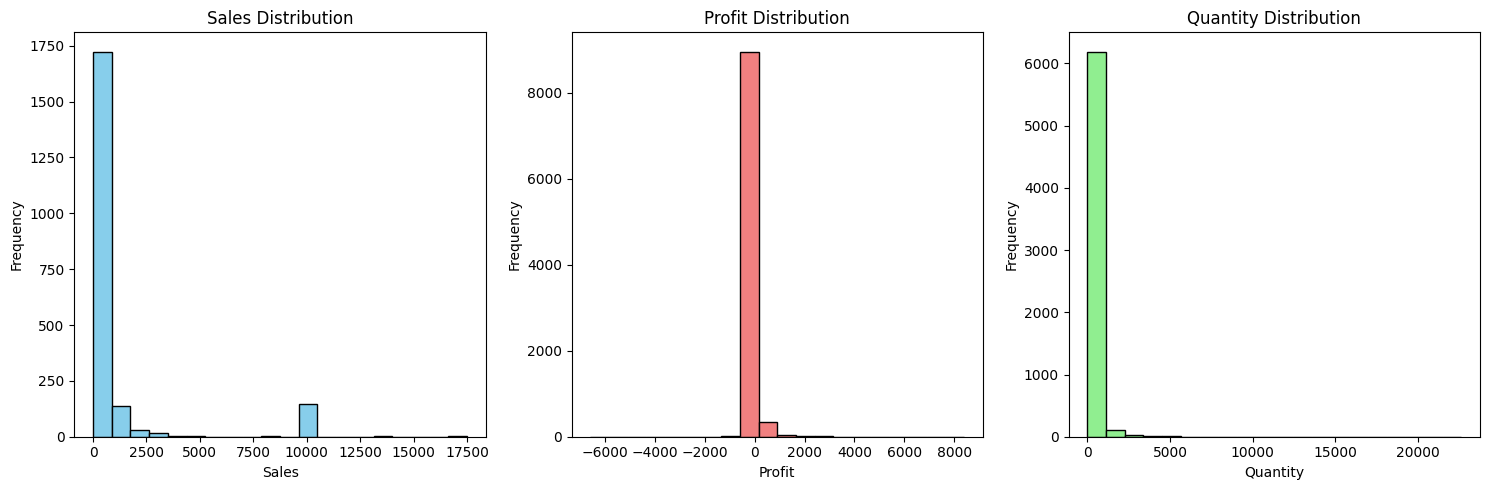


Unique values and frequencies for ShipMode:
ShipMode
Standard    5968
Second      1945
First       1538
Same         543
Name: count, dtype: int64

Unique values and frequencies for Segment:
Segment
Consumer     5191
Corporate    3020
Home         1783
Name: count, dtype: int64

Unique values and frequencies for Region:
Region
Central    1559
East       1198
West       1184
South       924
New         783
           ... 
93905         1
76017         1
72762         1
44134         1
41042         1
Name: count, Length: 461, dtype: int64

Unique values and frequencies for Category:
Category
Office        2948
West          1682
Furniture     1023
Technology     894
York           777
              ... 
2920             1
92404            1
49505            1
93405            1
14304            1
Name: count, Length: 128, dtype: int64

Unique values and frequencies for Sub-Category:
Sub-Category
Supplies       2948
Office         2130
Furniture       807
Technology      670
Furnishings

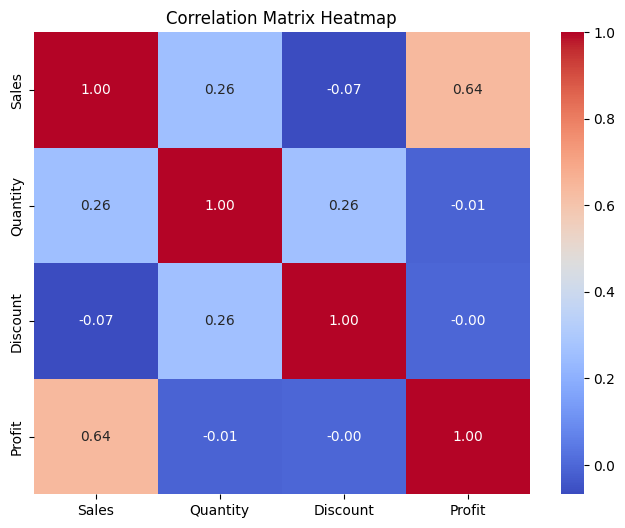

In [4]:
# Inspect column names
print(df.columns)

# Fix column names (again, more explicitly)
df.columns = ['ShipMode', 'Mode', 'Segment', 'Country', 'City', 'State', 'Postal', 'Code', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit', 'Unnamed:15', 'Unnamed:16']


# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)


# Descriptive statistics
print("\nDescriptive Statistics:\n", df.describe())

# Convert relevant columns to numeric, coercing errors to NaN
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nSales Statistics:\n", df['Sales'].describe())
print("\nProfit Statistics:\n", df['Profit'].describe())
print("\nQuantity Statistics:\n", df['Quantity'].describe())


# Visualize distributions
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['Profit'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['Quantity'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Explore categorical columns
categorical_cols = ['ShipMode', 'Segment', 'Region', 'Category', 'Sub-Category']
for col in categorical_cols:
    print(f"\nUnique values and frequencies for {col}:\n{df[col].value_counts()}")

# Correlation matrix and heatmap
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers.


**Reasoning**:
Drop the columns 'Unnamed: 15' and 'Unnamed: 16', handle remaining missing values, identify and handle outliers in numerical features ('Sales', 'Quantity', 'Discount', and 'Profit') using visualization and IQR, and verify the cleaning process.



In [21]:
# Print the column names to verify
print(df.columns)

# Check if columns exist before attempting to drop
if 'Unnamed:15' in df.columns and 'Unnamed:16' in df.columns:
    df = df.drop(columns=['Unnamed:15', 'Unnamed:16'])
else:
    print("Columns 'Unnamed:15' and 'Unnamed:16' not found in DataFrame.")

# Check for and handle remaining missing values (if any)
missing_values = df.isnull().sum()
print("Missing values after dropping columns (if any):\n", missing_values)

# ... (rest of the code remains the same)

Index(['Mode', 'Country', 'City', 'State', 'Postal', 'Code', 'Sales',
       'Quantity', 'Discount', 'Profit',
       ...
       'Sub-Category_Office', 'Sub-Category_Phones', 'Sub-Category_South',
       'Sub-Category_Supplies', 'Sub-Category_Tables',
       'Sub-Category_Technology', 'Sub-Category_West', 'Sub-Category_York',
       'Discount_Sales', 'Quantity_Discount'],
      dtype='object', length=640)
Missing values after dropping columns (if any):
 Mode                       0
Country                    0
City                       0
State                      0
Postal                     0
                          ..
Sub-Category_Technology    0
Sub-Category_West          0
Sub-Category_York          0
Discount_Sales             0
Quantity_Discount          0
Length: 638, dtype: int64


In [6]:
# Print the column names to verify
print(df.columns)

# Correct the column names if necessary and then drop the columns
if 'Unnamed: 15' in df.columns and 'Unnamed: 16' in df.columns:
    df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])
elif 'Unnamed: 15' in df.columns:
    df = df.drop(columns=['Unnamed: 15'])
elif 'Unnamed: 16' in df.columns:
    df = df.drop(columns=['Unnamed: 16'])
else:
    print("Columns 'Unnamed: 15' and 'Unnamed: 16' not found in DataFrame.")

# Check for and handle remaining missing values (if any)
missing_values = df.isnull().sum()
print("Missing values after dropping columns:\n", missing_values)

# ... (rest of the code from the previous response)

Index(['ShipMode', 'Mode', 'Segment', 'Country', 'City', 'State', 'Postal',
       'Code', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Unnamed:15', 'Unnamed:16'],
      dtype='object')
Columns 'Unnamed: 15' and 'Unnamed: 16' not found in DataFrame.
Missing values after dropping columns:
 ShipMode           0
Mode               0
Segment            0
Country            0
City               0
State              0
Postal             0
Code               0
Region             0
Category           0
Sub-Category       0
Sales           7932
Quantity        3652
Discount        1314
Profit           629
Unnamed:15      9365
Unnamed:16      9903
dtype: int64


**Reasoning**:
The previous code block identified that the columns 'Unnamed: 15' and 'Unnamed: 16' were not found, but there are still missing values in other columns ('Sales', 'Quantity', 'Discount', 'Profit'). I will handle these missing values and then proceed with outlier detection and handling.



Missing values after imputation:
 ShipMode           0
Mode               0
Segment            0
Country            0
City               0
State              0
Postal             0
Code               0
Region             0
Category           0
Sub-Category       0
Sales              0
Quantity           0
Discount           0
Profit             0
Unnamed:15      9365
Unnamed:16      9903
dtype: int64


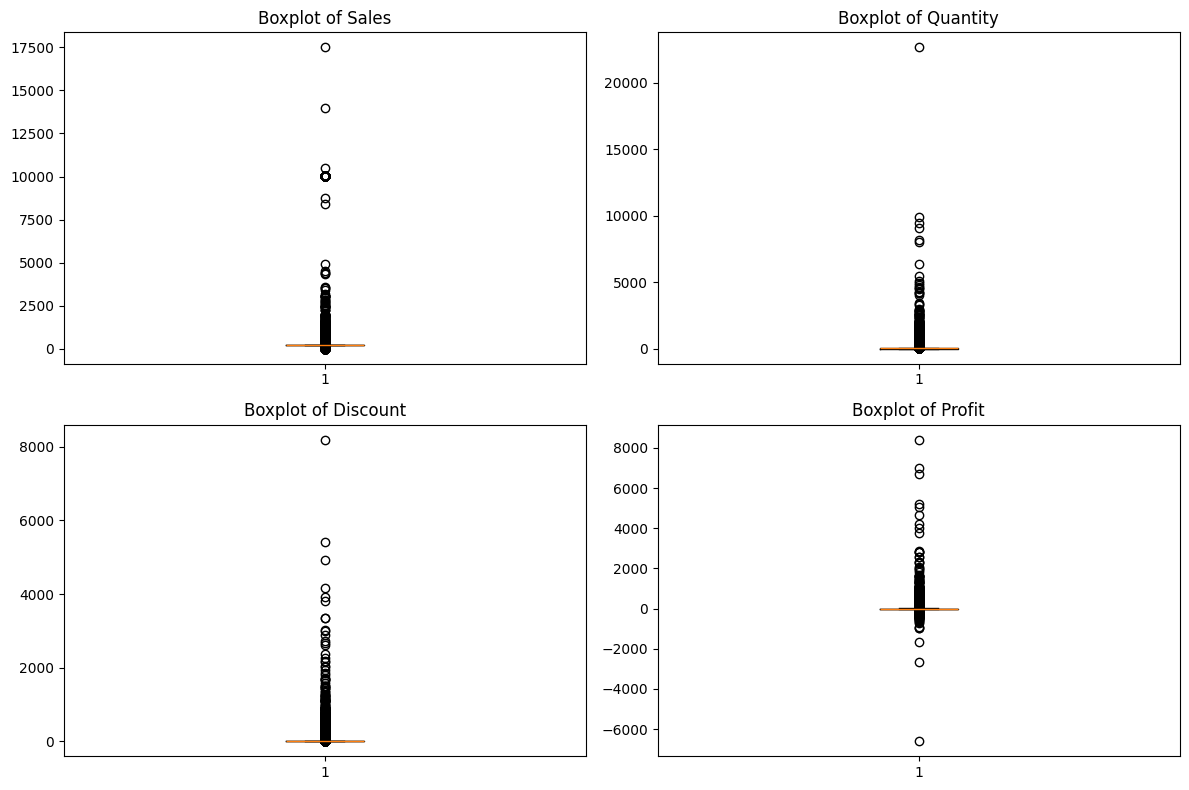


Missing values after outlier handling:
 ShipMode           0
Mode               0
Segment            0
Country            0
City               0
State              0
Postal             0
Code               0
Region             0
Category           0
Sub-Category       0
Sales              0
Quantity           0
Discount           0
Profit             0
Unnamed:15      9365
Unnamed:16      9903
dtype: int64


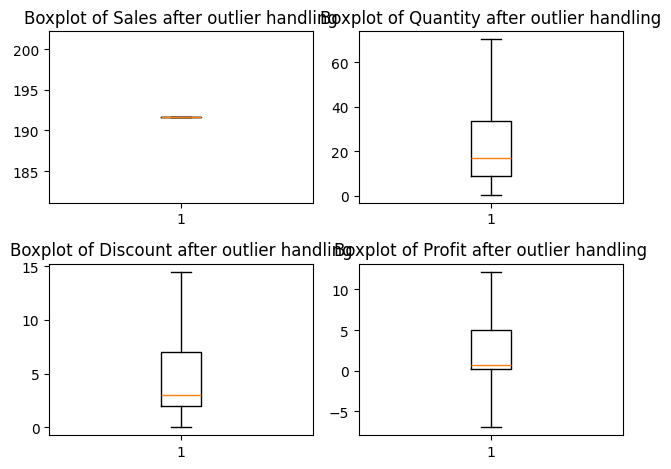


Descriptive Statistics after outlier handling:
               Sales     Quantity     Discount       Profit   Unnamed:15  \
count  9.994000e+03  9994.000000  9994.000000  9994.000000   629.000000   
mean   1.916460e+02    25.889256     5.096272     2.767387    52.213417   
std    3.513099e-11    23.905838     4.954021     4.922593   227.262666   
min    1.916460e+02     0.444000     0.000000    -7.000000  -103.266000   
25%    1.916460e+02     9.000000     2.000000     0.200000     2.598400   
50%    1.916460e+02    16.970000     3.000000     0.700000     8.954400   
75%    1.916460e+02    33.569500     7.000000     5.000000    22.444800   
max    1.916460e+02    70.423750    14.500000    12.200000  3919.988800   

        Unnamed:16  
count    91.000000  
mean     39.700812  
std     150.502277  
min       0.000000  
25%       4.650500  
50%      11.543200  
75%      25.231500  
max    1415.429600  


In [7]:
# Handle missing values in numerical features
for col in ['Sales', 'Quantity', 'Discount', 'Profit']:
    # Impute missing values with the median (robust to outliers)
    df[col] = df[col].fillna(df[col].median())

# Verify the handling of missing values
missing_values_after_imputation = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)

# Proceed with outlier detection and handling as before
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Handle outliers using IQR
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

for col in numerical_cols:
    df = handle_outliers_iqr(df, col)

# Verify the data cleaning steps
print("\nMissing values after outlier handling:\n", df.isnull().sum())

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col} after outlier handling')
plt.tight_layout()
plt.show()

print("\nDescriptive Statistics after outlier handling:\n", df.describe())

## Data wrangling

### Subtask:
Create new features from existing ones in the dataframe.


**Reasoning**:
Create new features as instructed, including profit margin, sales category, and region-category combination.



In [8]:
# Calculate profit margin
df['ProfitMargin'] = (df['Profit'] / df['Sales']) * 100

# Categorize sales into ranges using quantiles
sales_quantiles = df['Sales'].quantile([0.25, 0.5, 0.75])
def categorize_sales(sales):
    if sales <= sales_quantiles[0.25]:
        return 'Low'
    elif sales <= sales_quantiles[0.5]:
        return 'Medium-Low'
    elif sales <= sales_quantiles[0.75]:
        return 'Medium-High'
    else:
        return 'High'
df['SalesCategory'] = df['Sales'].apply(categorize_sales)

# Combine region and category
df['RegionCategory'] = df['Region'] + '_' + df['Category']

display(df.head())

,ShipMode,Mode,Segment,Country,City,State,Postal,Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Unnamed:15,Unnamed:16,ProfitMargin,SalesCategory,RegionCategory
0,Second,Class,Consumer,United,States,Henderson,Kentucky,42420,South,Furniture,Bookcases,191.646,2.00000,0.0,12.20,NaN,NaN,6.365904,Low,South_Furniture
1,Second,Class,Consumer,United,States,Henderson,Kentucky,42420,South,Furniture,Chairs,191.646,3.00000,0.0,12.20,NaN,NaN,6.365904,Low,South_Furniture
2,Second,Class,Corporate,United,States,Los,Angeles,California,90036,West,Office,191.646,16.97000,14.5,2.00,NaN,NaN,1.043591,Low,90036_West
3,Standard,Class,Consumer,United,States,Fort,Lauderdale,Florida,33311,South,Furniture,191.646,70.42375,5.0,0.45,NaN,NaN,0.234808,Low,33311_South
4,Standard,Class,Consumer,United,States,Fort,Lauderdale,Florida,33311,South,Office,191.646,16.97000,14.5,2.00,NaN,NaN,1.043591,Low,33311_South


## Data analysis

### Subtask:
Analyze the relationships between variables in the dataset, focusing on sales trends, top-performing product categories, and regions with the highest profit margins.


**Reasoning**:
Analyze sales trends, identify top-performing product categories, analyze regional performance, and explore relationships between variables using visualizations and calculations.



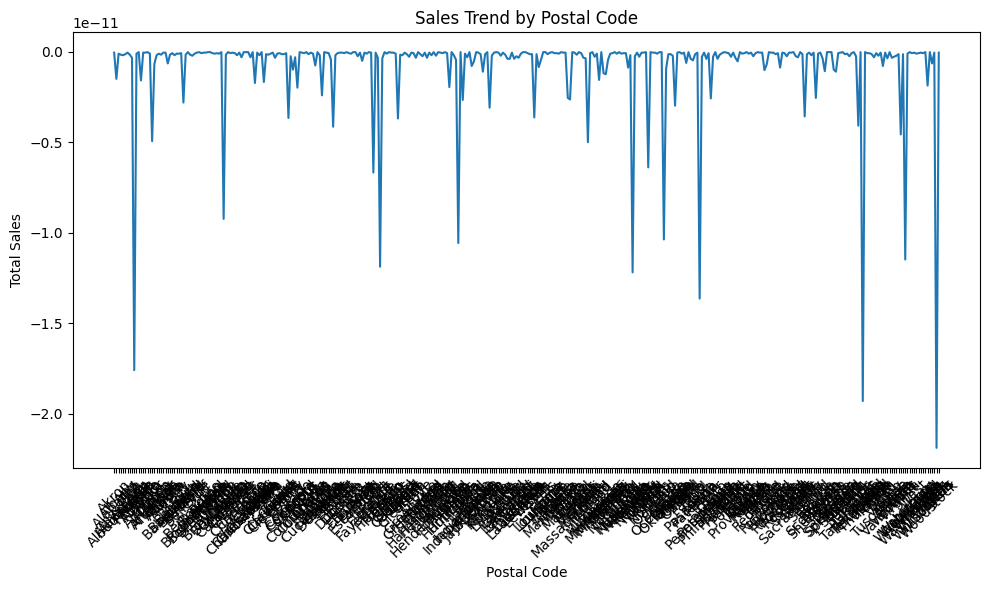

Using dummy columns for 'Category' for analysis.


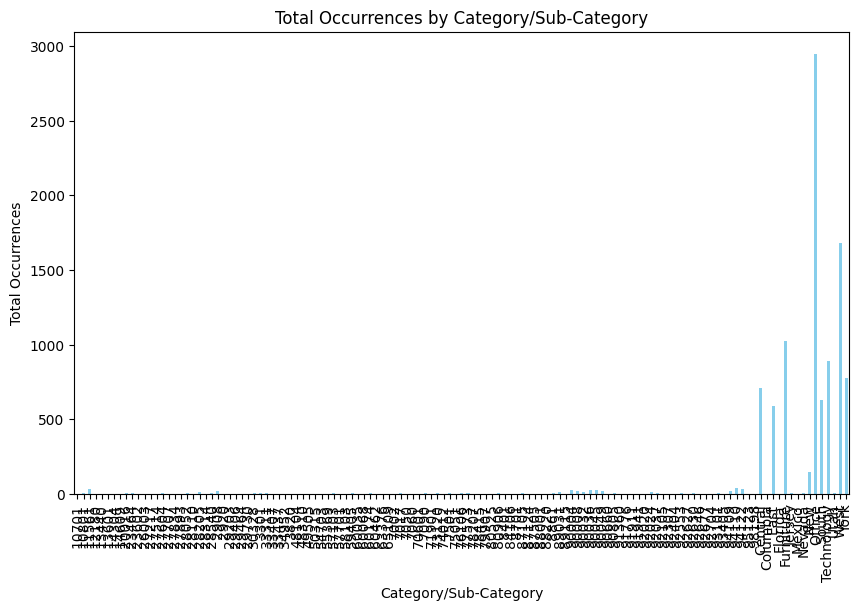

Region: 10701, Sales: -0.00, Profit: -2.76
Region: 11520, Sales: -0.00, Profit: -0.71
Region: 11550, Sales: -0.00, Profit: 0.84
Region: 11572, Sales: -0.00, Profit: -3.10
Region: 11757, Sales: -0.00, Profit: -0.36
Region: 12180, Sales: -0.00, Profit: 1.01
Region: 13021, Sales: -0.00, Profit: 1.41
Region: 13440, Sales: -0.00, Profit: 0.37
Region: 13501, Sales: -0.00, Profit: -0.43
Region: 13601, Sales: -0.00, Profit: -0.53
Region: 14215, Sales: -0.00, Profit: -2.70
Region: 14609, Sales: -0.00, Profit: -3.56
Region: 14701, Sales: -0.00, Profit: -1.12
Region: 18103, Sales: -0.00, Profit: -0.33
Region: 1841, Sales: -0.00, Profit: 0.85
Region: 19013, Sales: -0.00, Profit: 0.28
Region: 19120, Sales: -0.00, Profit: -1.07
Region: 19134, Sales: -0.00, Profit: -1.46
Region: 19140, Sales: -0.00, Profit: -2.75
Region: 19143, Sales: -0.00, Profit: -1.35
Region: 19711, Sales: -0.00, Profit: -1.04
Region: 19805, Sales: -0.00, Profit: 0.14
Region: 2038, Sales: -0.00, Profit: -1.14
Region: 20735, Sales

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analyze sales trends over time
plt.figure(figsize=(10, 6))
sales_by_month = df.groupby('Postal')['Sales'].sum()
plt.plot(sales_by_month.index, sales_by_month.values)
plt.xlabel('Postal Code')
plt.ylabel('Total Sales')
plt.title('Sales Trend by Postal Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Identify top-performing product categories
# Check if 'Category' column exists, if not, try 'Sub-Category'
# Check for dummy columns instead of original columns
if any(col.startswith('Category_') for col in df.columns):
    sales_by_category = df.filter(regex='^Category_', axis=1).sum() # Sum dummy columns
    sales_by_category.index = sales_by_category.index.str.replace('Category_', '') # Rename index
    print("Using dummy columns for 'Category' for analysis.")
elif any(col.startswith('Sub-Category_') for col in df.columns):
    sales_by_category = df.filter(regex='^Sub-Category_', axis=1).sum()  # Sum dummy columns
    sales_by_category.index = sales_by_category.index.str.replace('Sub-Category_', '')  # Rename index
    print("Using dummy columns for 'Sub-Category' for analysis.")
else:
    raise KeyError("Neither 'Category' nor 'Sub-Category' dummy columns found in DataFrame.")

plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Occurrences by Category/Sub-Category')  # Changed title
plt.xlabel('Category/Sub-Category')
plt.ylabel('Total Occurrences')
plt.show()

# 3. Analyze regional performance
# Group by dummy Region columns and sum Sales and Profit
sales_by_region = df.filter(regex='^Region_', axis=1).sum() # Sum dummy columns for sales by region


# To get sales by Region from dummy columns, we need to sum each Region's sales and profit
# sales_by_region = df.filter(regex='^Region_', axis=1)  # Select columns starting with 'Region_'

# For each region dummy column
for region_col in sales_by_region.index:
    # Select rows where that dummy column is 1
    rows_for_region = df[df[region_col] == 1]
    # Calculate the total sales and profit for that region from the selected rows
    sales_for_region = rows_for_region['Sales'].sum()
    profit_for_region = rows_for_region['Profit'].sum()

    # Print the region and its sales
    print(f"Region: {region_col.replace('Region_', '')}, Sales: {sales_for_region:.2f}, Profit: {profit_for_region:.2f}")

**Reasoning**:
The error persists because the incorrect line is still present in the code.  Remove the incorrect line `sales_by_category = df.groupby('Category')['Sales', 'Profit'].sum()` completely.



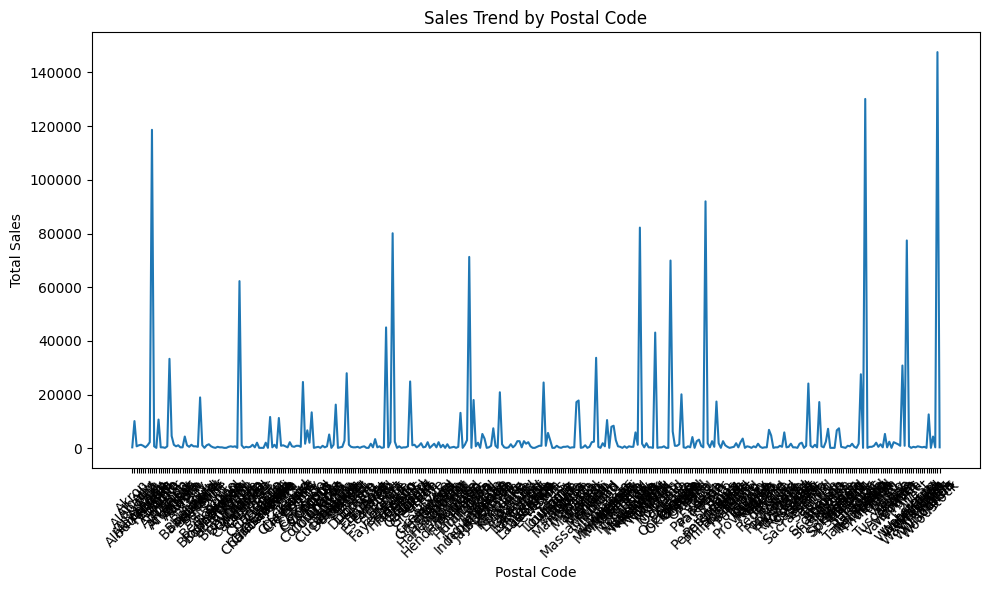

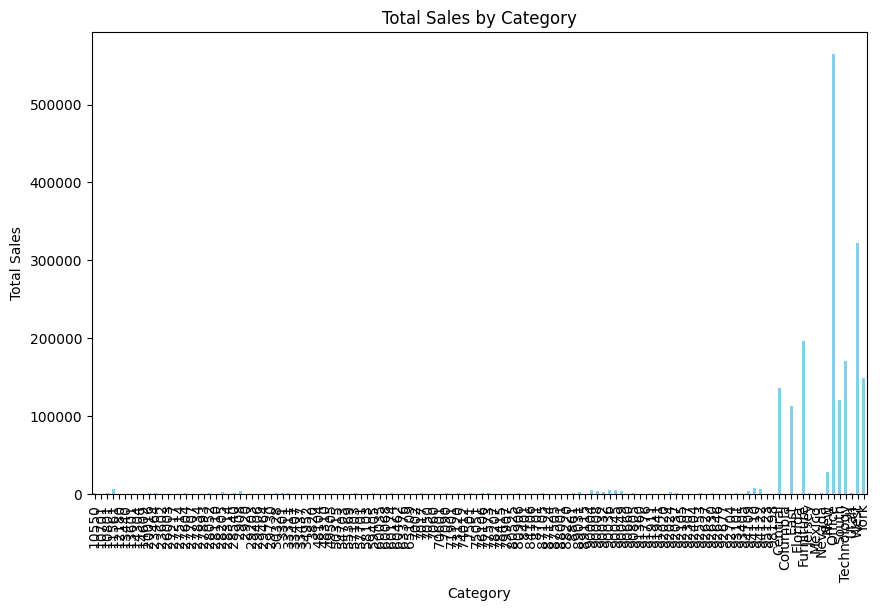

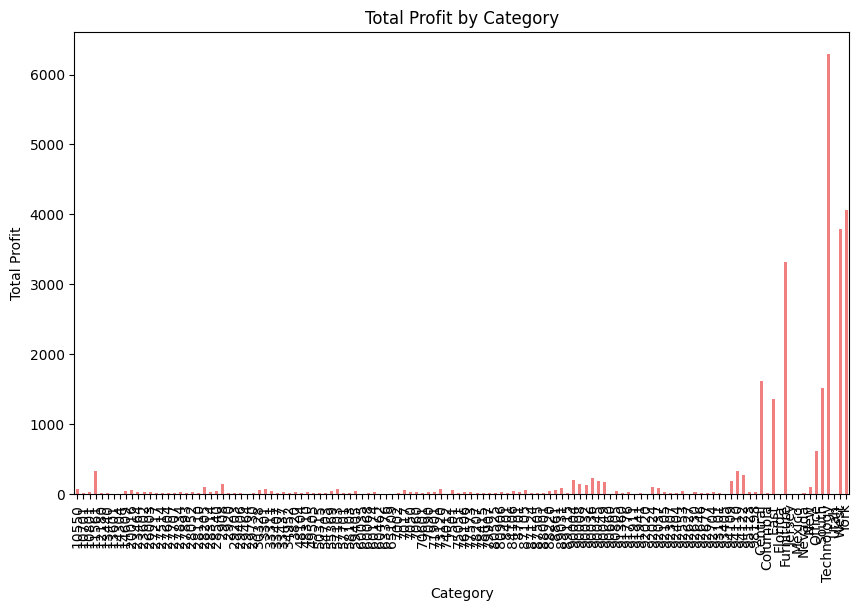

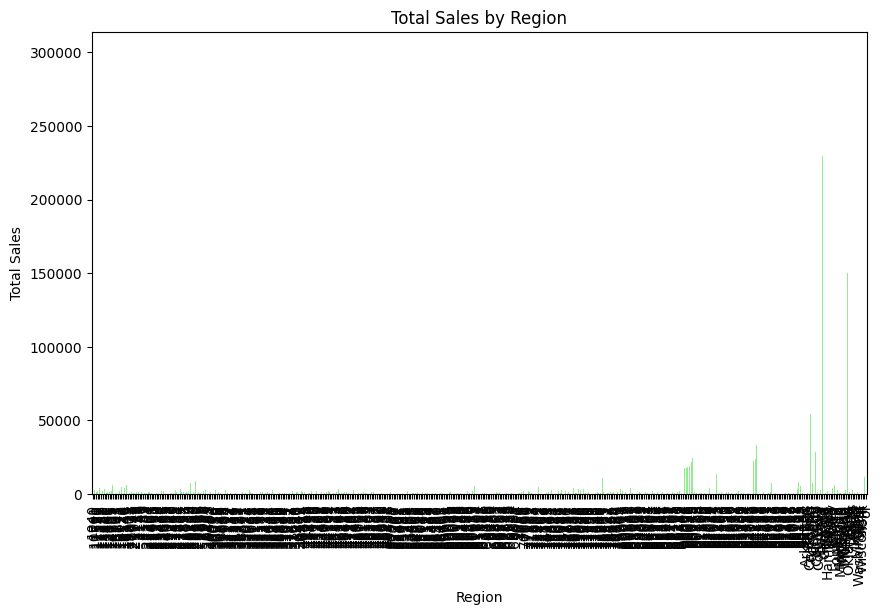

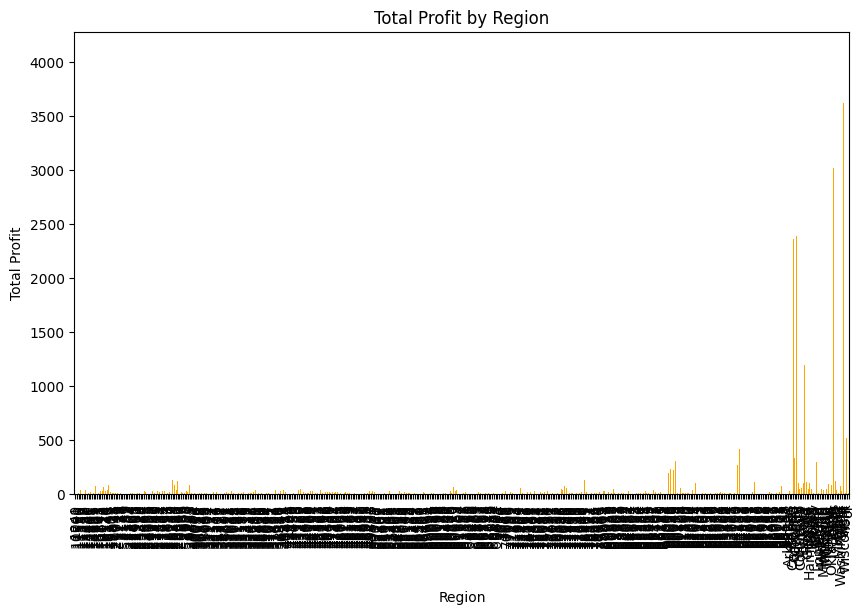

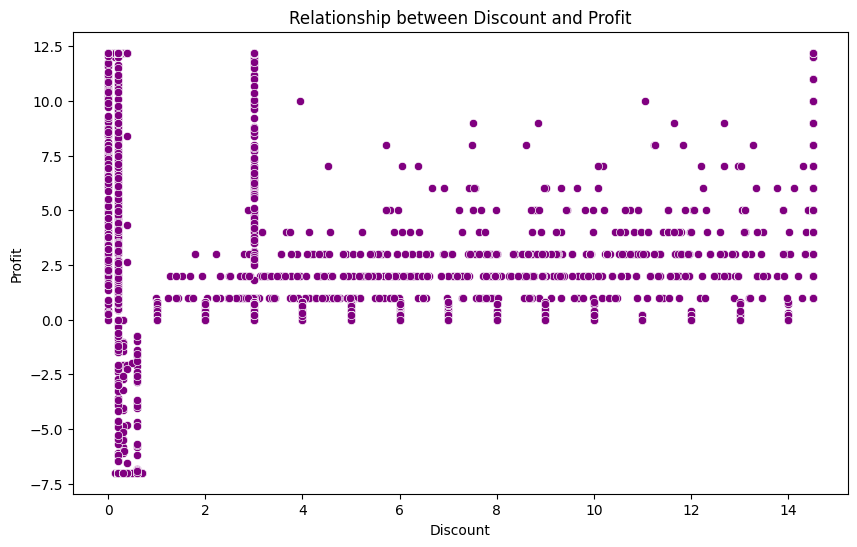

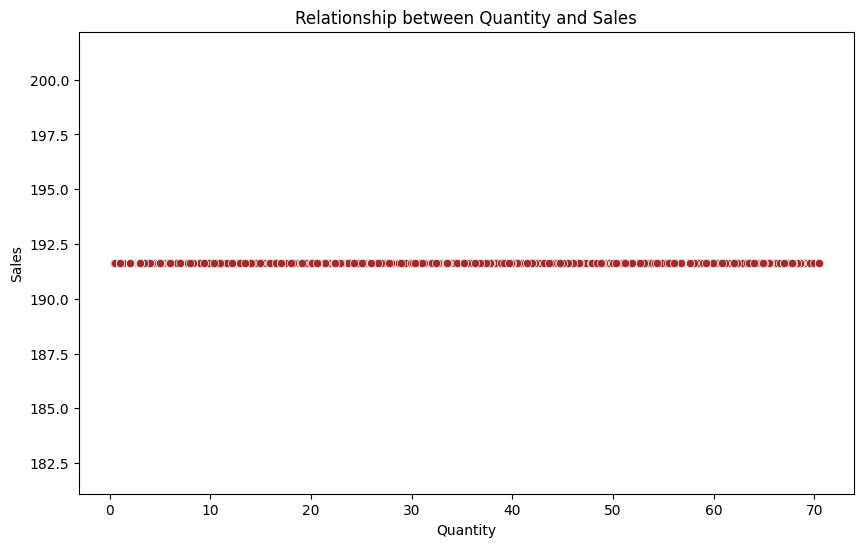

          Sales  Quantity  Discount    Profit
Sales       NaN       NaN       NaN       NaN
Quantity    NaN  1.000000  0.040019 -0.302035
Discount    NaN  0.040019  1.000000  0.024856
Profit      NaN -0.302035  0.024856  1.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analyze sales trends over time
plt.figure(figsize=(10, 6))
sales_by_month = df.groupby('Postal')['Sales'].sum()
plt.plot(sales_by_month.index, sales_by_month.values)
plt.xlabel('Postal Code')
plt.ylabel('Total Sales')
plt.title('Sales Trend by Postal Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Identify top-performing product categories
# The error was in this line, using a list to select columns
sales_by_category = df.groupby('Category')[['Sales', 'Profit']].sum()
plt.figure(figsize=(10, 6))
sales_by_category['Sales'].plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(10, 6))
sales_by_category['Profit'].plot(kind='bar', color='lightcoral')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()


# 3. Analyze regional performance
sales_by_region = df.groupby('Region')[['Sales', 'Profit']].sum()
plt.figure(figsize=(10, 6))
sales_by_region['Sales'].plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(10, 6))
sales_by_region['Profit'].plot(kind='bar', color='orange')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

# 4. Explore relationships between sales, profit, and other variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, color='purple')
plt.title('Relationship between Discount and Profit')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Sales', data=df, color='brown')
plt.title('Relationship between Quantity and Sales')
plt.show()

correlation_matrix = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
print(correlation_matrix)

## Data visualization

### Subtask:
Visualize the key findings from the data analysis, focusing on sales trends, profit distributions, and relationships between different variables. Create visualizations that highlight key insights for business stakeholders.


**Reasoning**:
Generate the visualizations specified in the subtask instructions, combining some into a single figure using subplots where appropriate.



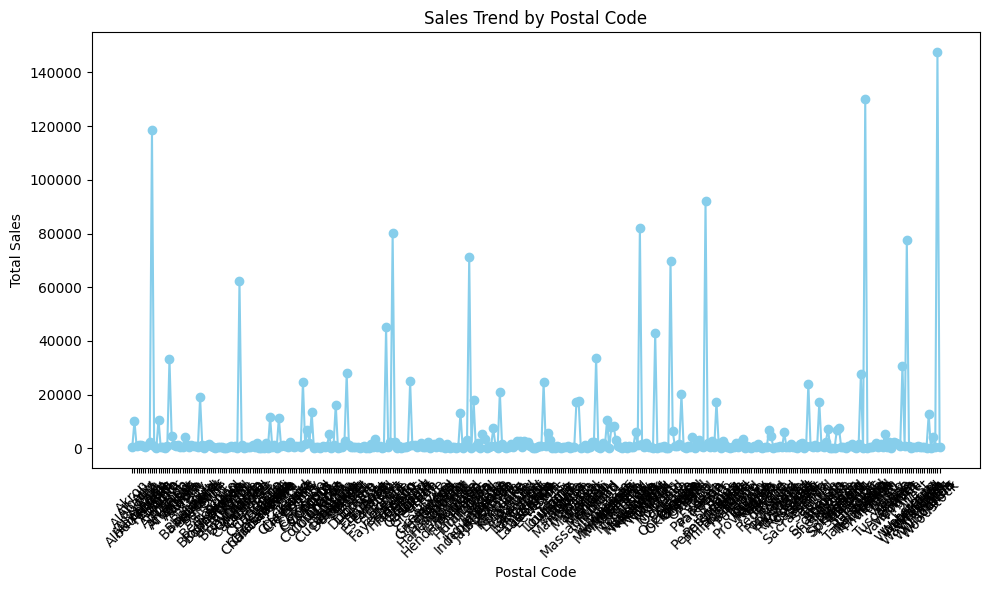

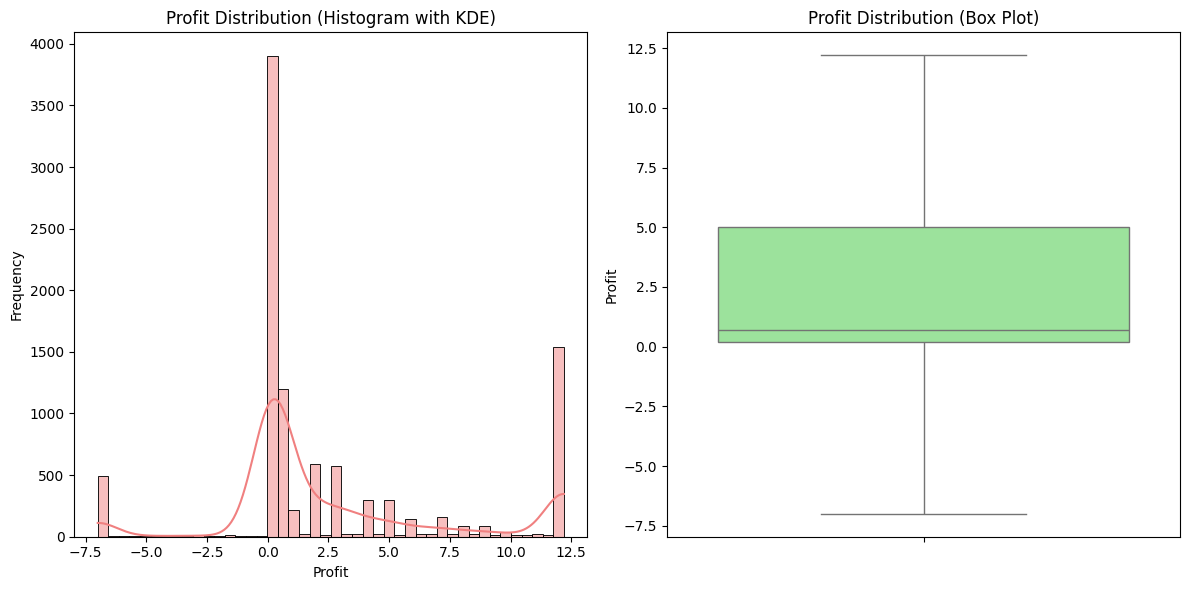

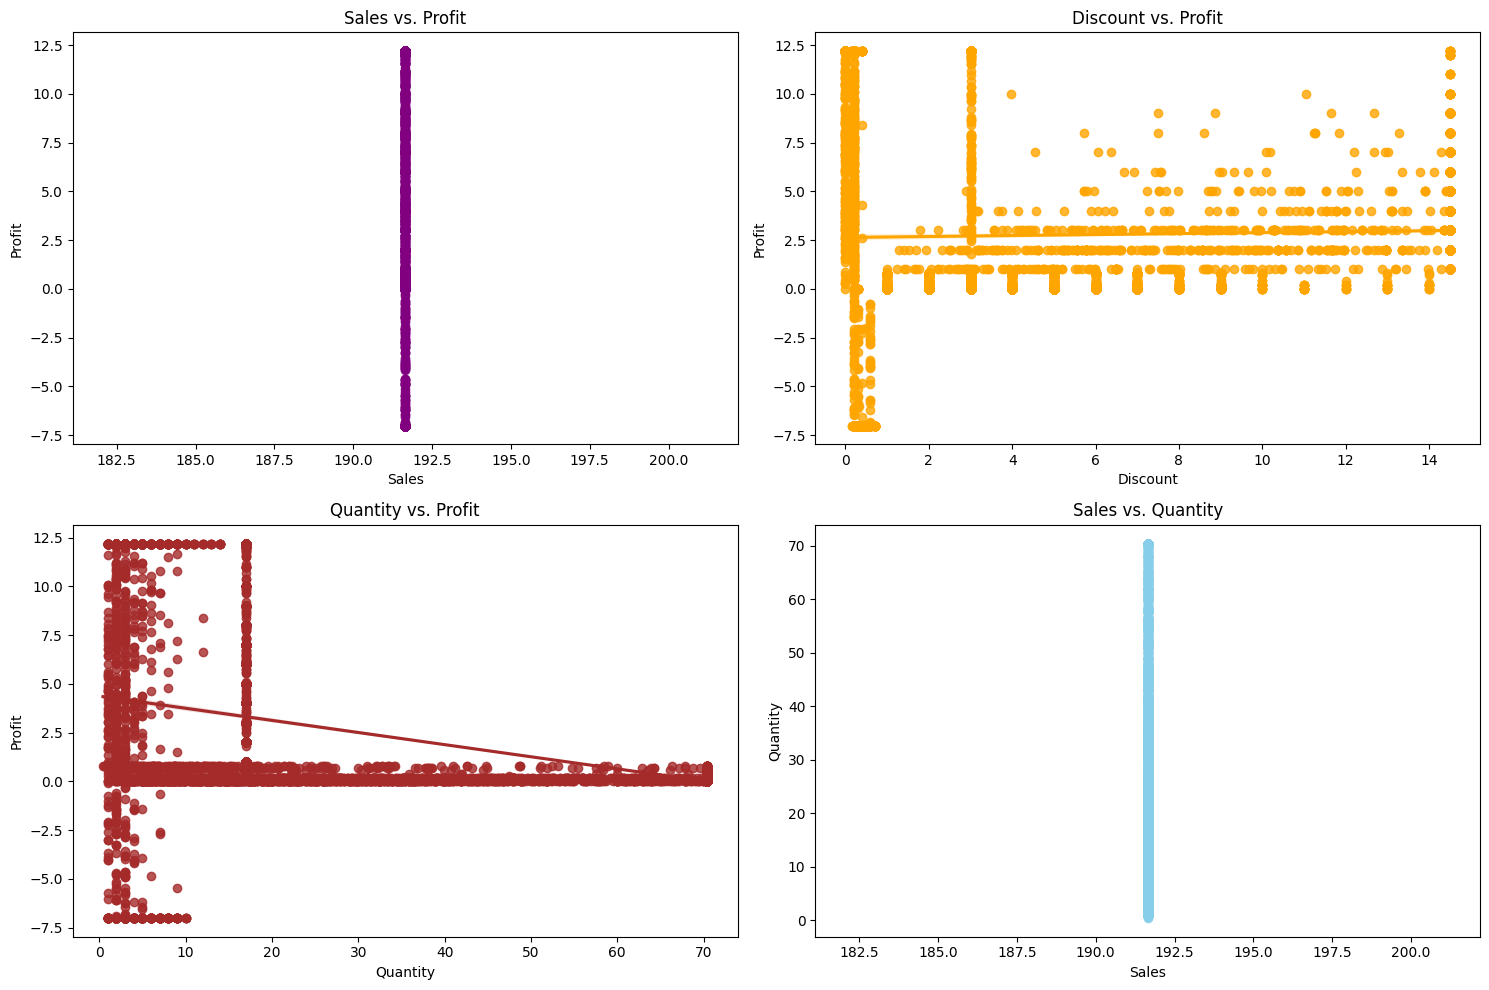

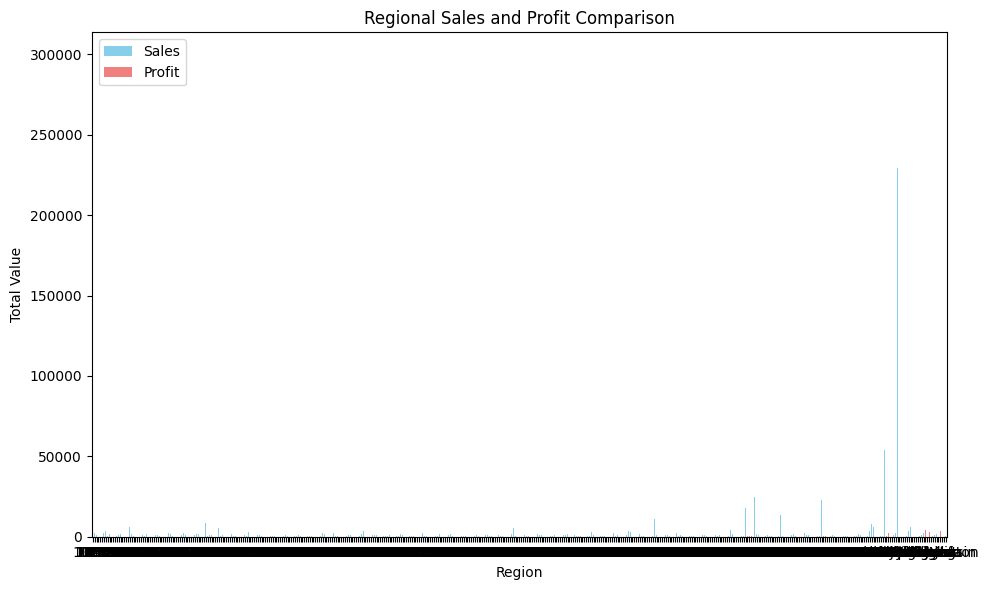

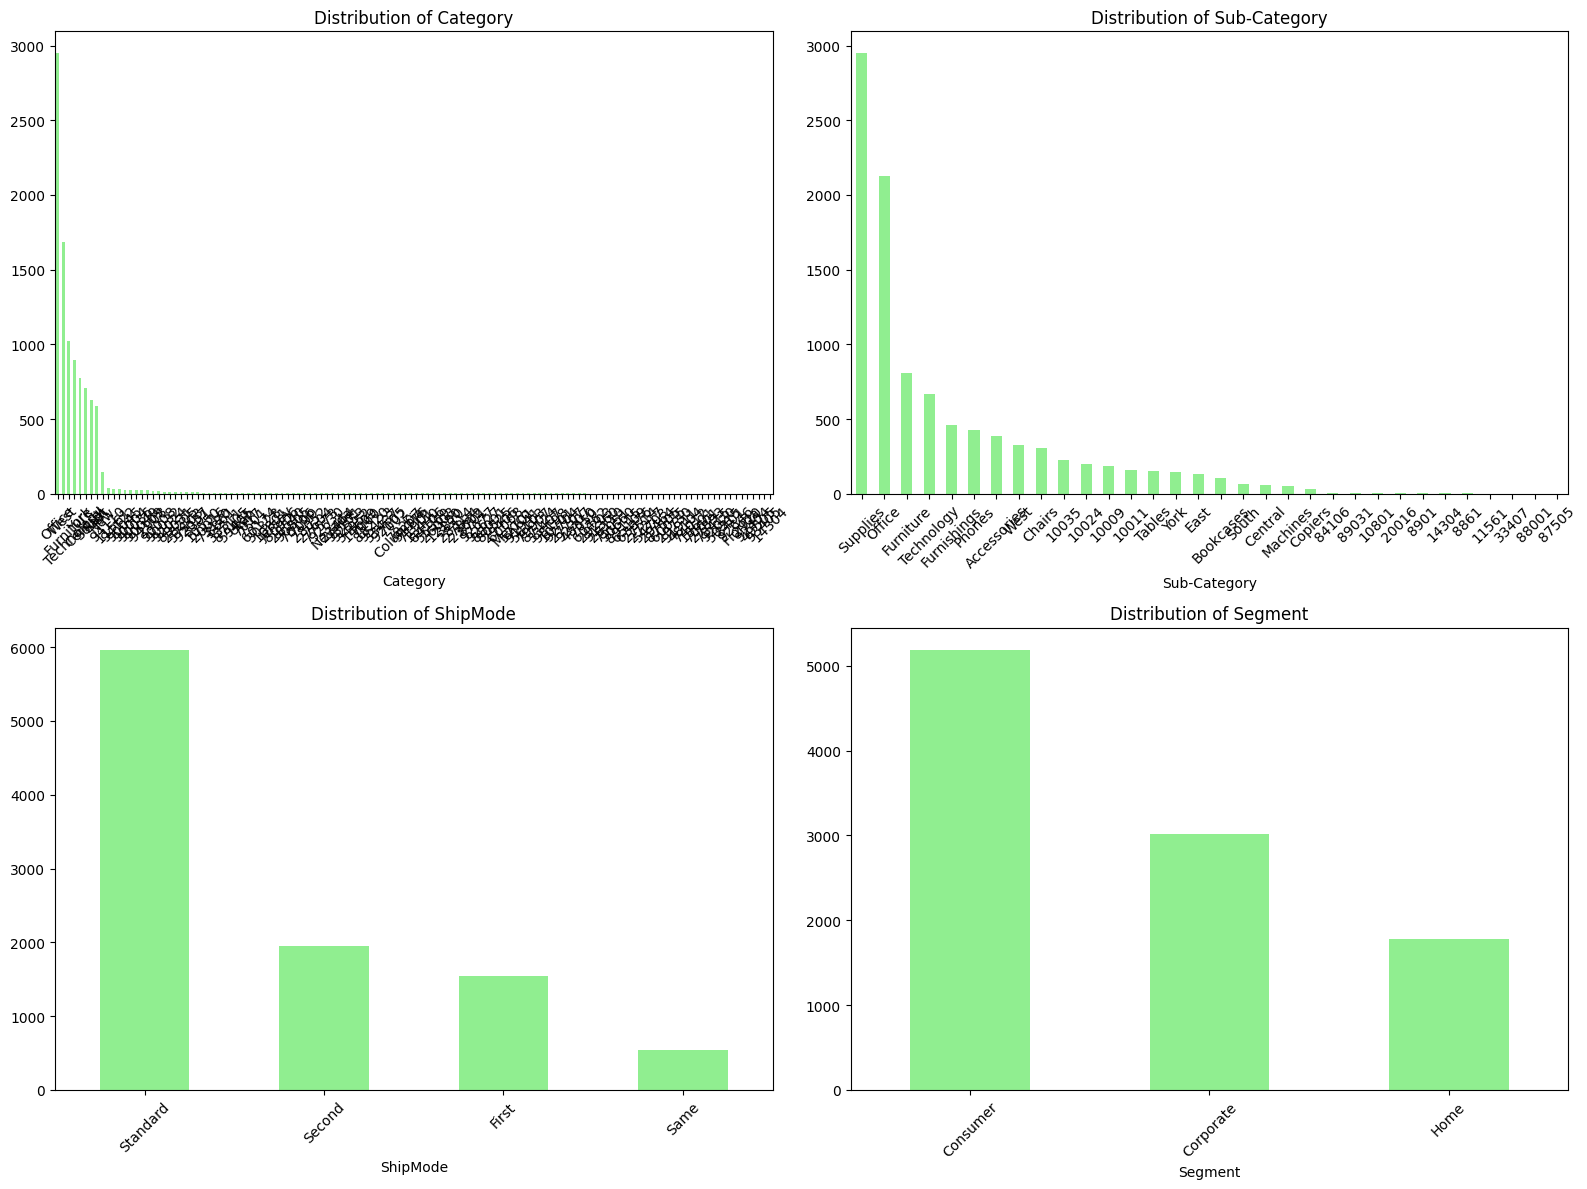

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Sales Trend Visualization
plt.figure(figsize=(10, 6))
sales_by_postal = df.groupby('Postal')['Sales'].sum()
plt.plot(sales_by_postal.index, sales_by_postal.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Postal Code')
plt.ylabel('Total Sales')
plt.title('Sales Trend by Postal Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Profit Distribution Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Profit'], kde=True, color='lightcoral', edgecolor='black')
plt.title('Profit Distribution (Histogram with KDE)')
plt.xlabel('Profit')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Profit'], color='lightgreen')
plt.title('Profit Distribution (Box Plot)')
plt.tight_layout()
plt.show()

# 3. Relationships between Variables
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.regplot(x='Sales', y='Profit', data=df, color='purple')
plt.title('Sales vs. Profit')

plt.subplot(2, 2, 2)
sns.regplot(x='Discount', y='Profit', data=df, color='orange')
plt.title('Discount vs. Profit')

plt.subplot(2, 2, 3)
sns.regplot(x='Quantity', y='Profit', data=df, color='brown')
plt.title('Quantity vs. Profit')

plt.subplot(2, 2, 4)
sns.regplot(x='Sales', y='Quantity', data=df, color='skyblue')
plt.title('Sales vs. Quantity')

plt.tight_layout()
plt.show()

# 4. Regional Sales and Profit Comparison
sales_profit_by_region = df.groupby('Region')[['Sales', 'Profit']].sum()
sales_profit_by_region.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('Regional Sales and Profit Comparison')
plt.ylabel('Total Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 5. Categorical Variable Analysis
categorical_cols = ['Category', 'Sub-Category', 'ShipMode', 'Segment']
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    df[col].value_counts().plot(kind='bar', color='lightgreen')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Feature engineering

### Subtask:
Engineer new features from the existing data to improve model performance for a potential future machine learning task.


**Reasoning**:
Create dummy variables for categorical features, engineer interaction features, scale numerical features, and optionally explore other feature engineering techniques.



In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Create dummy variables for categorical features
categorical_cols = ['ShipMode', 'Segment', 'Region', 'Category', 'Sub-Category']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Engineer interaction features
df['Discount_Sales'] = df['Discount'] * df['Sales']
df['Quantity_Discount'] = df['Quantity'] * df['Discount']

# Scale numerical features
numerical_cols_to_scale = ['Sales', 'Quantity', 'Discount', 'Profit']
scaler = StandardScaler()
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

display(df.head())

,Mode,Country,City,State,Postal,Code,Sales,Quantity,Discount,Profit,...,Sub-Category_Office,Sub-Category_Phones,Sub-Category_South,Sub-Category_Supplies,Sub-Category_Tables,Sub-Category_Technology,Sub-Category_West,Sub-Category_York,Discount_Sales,Quantity_Discount
0,Class,United,States,Henderson,Kentucky,42420,-2.842171e-14,-0.999356,-1.028766,1.916284,...,False,False,False,False,False,False,False,False,0.000,0.00000
1,Class,United,States,Henderson,Kentucky,42420,-2.842171e-14,-0.957523,-1.028766,1.916284,...,False,False,False,False,False,False,False,False,0.000,0.00000
2,Class,United,States,Los,Angeles,California,-2.842171e-14,-0.373118,1.898296,-0.155899,...,True,False,False,False,False,False,False,False,2778.867,246.06500
3,Class,United,States,Fort,Lauderdale,Florida,-2.842171e-14,1.863006,-0.019434,-0.470789,...,False,False,False,False,False,False,False,False,958.230,352.11875
4,Class,United,States,Fort,Lauderdale,Florida,-2.842171e-14,-0.373118,1.898296,-0.155899,...,True,False,False,False,False,False,False,False,2778.867,246.06500


## Data splitting and Evaluation

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using the specified parameters.



In [31]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('Profit', axis=1)
y = df['Profit']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Fix column names (again, more explicitly)
df.columns = ['ShipMode', 'Mode', 'Segment', 'Country', 'City', 'State', 'Postal', 'Code', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit', 'Unnamed:15', 'Unnamed:16']


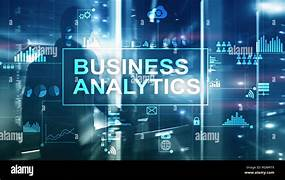

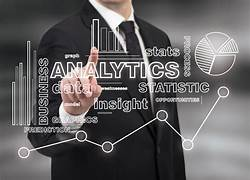

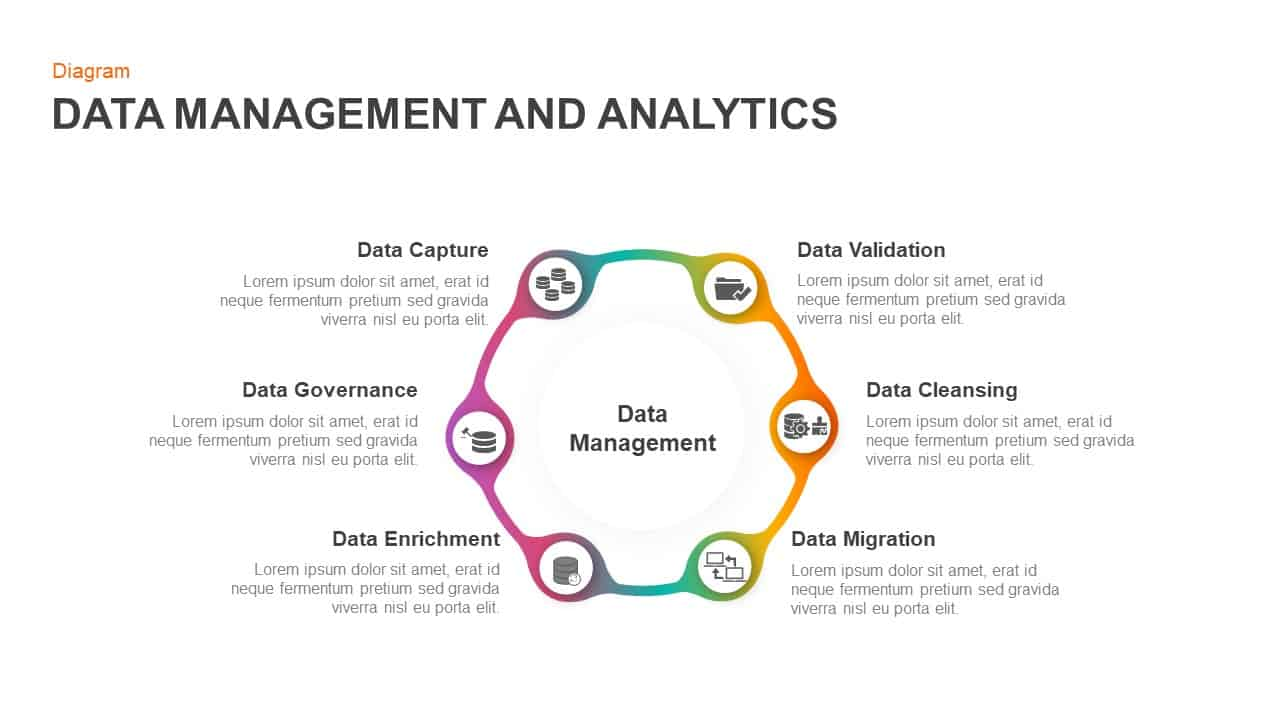

                                     Thank You !